# 线性回归

## 线性回归是一种最简单的机器学习模型，试图学习一个通过属性的线性组合来进行预测的函数，对于线性组合来说，有两种求解方式

1. 最小二乘法
2. 梯度下降

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

### 构造数据集

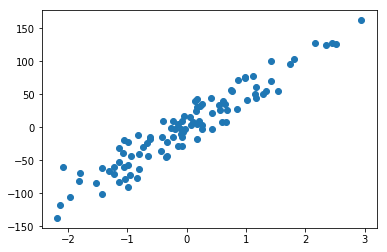

In [5]:
X,y = make_regression(n_samples=100,noise=20,n_features=1)
plt.scatter(X,y)

## 使用最小二乘法来求解

#### 最小二乘法是一种求解释一种基于均方误差来求解的一种方法，在线性回归中，最小二乘法就是试图找到一条直线，使所有的样本到直线上的欧式距离最小

$Ax = b$

$A^TAx = A^Tb$

则

$x = (A^TA)^{-1}A^Tb$

### 在这里，x就是我们所要求得的参数

In [46]:
ones = np.ones(X.shape[0])
A = np.insert(X, 0, 1, axis=1)  # 特征

In [47]:
b = y.reshape(-1,1)

### 使用最小二乘法求解

$Ax=b$

In [48]:
x = np.linalg.inv(A.T @ A) @ A.T @ b

### 那么X为

In [49]:
x

array([[  1.86962816],
       [ 52.04612077]])

### 也就是我们需要求解的参数，我们将该方程画图出来

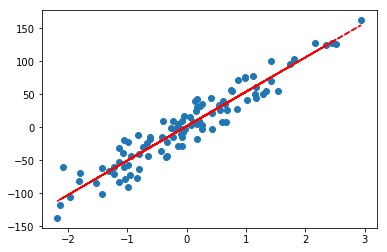

In [50]:
plt.scatter(X,y)

y_pred = A @ x

plt.plot(X,y_pred,'r--')

### 最小二乘法是非常常用的算法来求解 线性回归问题

# 使用梯度下降来求解

In [128]:
class LinearRegression(object):
    def __init__(self):
        pass
    def fit(self,X,y):
        X = np.insert(X, 0, 1, axis=1)
        y = y.reshape(-1,1)
        self.w = np.random.randn(X.shape[1],1)
        
        for _ in range(50):
        
            y_pred = X @ self.w  # 100 * 1
            
            
            mse = np.mean(0.5*(y_pred-y)**2)

            grad_w = X.T @ (y_pred - y)
            
            self.w -= 0.01 * grad_w
            
            print(_,mse,self.w[0][0],self.w[1][0])
            
    def predict(self,X):
        X = np.insert(X, 0, 1, axis=1)
        return X @ self.w

In [129]:
lr = LinearRegression()

In [130]:
lr.fit(X,y)

0 1796.37498548 1.03848759583 60.5678621484
1 206.502750609 2.00319580077 50.6596463103
2 165.012107823 1.84789690336 52.271672086
3 163.914069364 1.87316339226 52.0094280955
4 163.885010042 1.86905304553 52.0520899281
5 163.884240995 1.86972171643 52.0451497045
6 163.884220642 1.8696129371 52.0462787395
7 163.884220103 1.86963063331 52.0460950682
8 163.884220089 1.86962775449 52.0461249478
9 163.884220089 1.86962822282 52.046120087
10 163.884220089 1.86962814663 52.0461208777
11 163.884220089 1.86962815903 52.0461207491
12 163.884220089 1.86962815701 52.04612077
13 163.884220089 1.86962815734 52.0461207666
14 163.884220089 1.86962815728 52.0461207672
15 163.884220089 1.86962815729 52.0461207671
16 163.884220089 1.86962815729 52.0461207671
17 163.884220089 1.86962815729 52.0461207671
18 163.884220089 1.86962815729 52.0461207671
19 163.884220089 1.86962815729 52.0461207671
20 163.884220089 1.86962815729 52.0461207671
21 163.884220089 1.86962815729 52.0461207671
22 163.884220089 1.869628

In [120]:
y_pred = lr.predict(X)

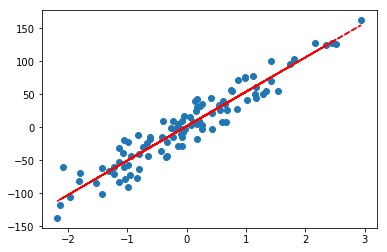

In [121]:
plt.scatter(X,y)

plt.plot(X,y_pred,'r--')

## 可以发现，使用梯度下降算法得到了与最小二乘法差不多的结果。

## 在周老师的书中，还提出了最优解的闭式解

* 参见西瓜书 54页

In [146]:
x_mean = np.mean(X)
Y = y.reshape(-1,1)

In [149]:
w = np.sum(Y*(X-x_mean))/(np.sum(X**2)-1./X.shape[0]*(np.sum(X))**2)

In [158]:
b = np.sum(Y-w*X)/X.shape[0]

In [160]:
b,w

(1.869628157291537, 52.046120767103673)

## 可见，这三种方式都是求线性规划的方法。

## 总结

* 使用最小二乘法来求解 $A^TAx=A^Tb$

* 使用梯度下降算法

* 使用闭包解

## 参考

* 54、55页周志华老师的西瓜书